In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
dataset = pd.read_csv('Data_Penduduk.csv')
dataset.sample(10)

,User ID,Jenis_Kelamin,Usia,Penghasilan,Jumlah_Anak
208,15800890,Laki-Laki,26,3850000,1
266,15721592,Laki-Laki,42,4100000,0
70,15756932,Perempuan,26,4300000,0
353,15750335,Perempuan,39,4100000,0
1,15810944,Perempuan,21,2500000,0
231,15694453,Laki-Laki,38,1800000,0
347,15768151,Perempuan,22,5200000,1
32,15573452,Perempuan,41,3000000,0
288,15649668,Laki-Laki,41,2500000,0
144,15622833,Perempuan,38,3600000,0


In [110]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[4]].values

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [112]:
X_train.shape

(300, 2)

In [113]:
y_train.shape

(300, 1)

In [114]:
X_test.shape

(100, 2)

In [115]:
y_test.shape

(100, 1)

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [118]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [119]:
y_actual = y_test.flatten()
y_actual

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [120]:
for i in range(len(y_actual)):
    print(f'Hasil aktual: {y_actual[i]} Hasil prediksi: {y_pred[i]}')

Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 1 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 1 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 1 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 1 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 1 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 0 Hasil prediksi: 0
Hasil aktual: 

No handles with labels found to put in legend.


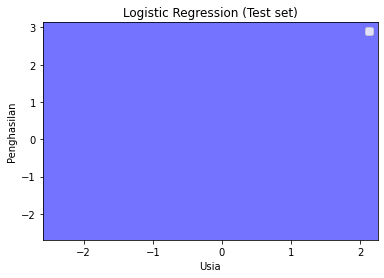

In [121]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()